In [1]:
# NumPy array를 활용해서 Mask 적용하기
import numpy as np
a = np.arange(-5, 5)
print(a)
print(a<0)     # bool list
print(a[a<0])  # bool list에서 true인 index

[-5 -4 -3 -2 -1  0  1  2  3  4]
[ True  True  True  True  True False False False False False]
[-5 -4 -3 -2 -1]


In [2]:
mask1 = abs(a)>3
print(a[mask1])

[-5 -4  4]


In [3]:
# using two masks (두 개의 조건 활용)
mask1 = abs(a)>3
mask2 = abs(a)%2==0
print(a[mask1+mask2])    # mask1 or mask2
print(a[mask1*mask2])    # mask1 and mask2

[-5 -4 -2  0  2  4]
[-4  4]


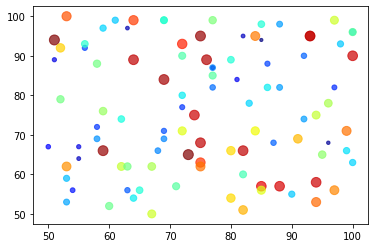

In [4]:
# Making Bubble chart without using NumPy
import matplotlib.pyplot as plt
import random
x = []
y = []
size = []
for i in range(100):
    x.append(random.randint(50,100))
    y.append(random.randint(50,100))
    size.append(random.randint(10,100))
plt.scatter(x,y,s = size, c = size, cmap = 'jet', alpha = 0.7)
plt.show()

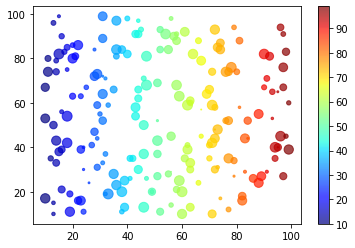

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# np의 random.randint() 사용해서 반복문 없이 작업
x = np.random.randint(10,100,200)   # 10~100사이 random 값 200개
y = np.random.randint(10,100,200)
size = np.random.rand(200)*100   #0~200 사이 random값, 100번 반복
plt.scatter(x,y,s=size, c=x, cmap = 'jet', alpha = 0.7)
plt.colorbar()
plt.show()

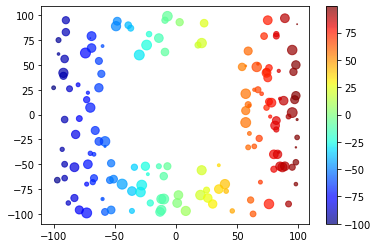

In [6]:
# NumPy random bubble chart + Masking
import matplotlib.pyplot as plt
import numpy as np
x = np.random.randint(-100,100,200)
y = np.random.randint(-100,100,200)
size = np.random.rand(200)*100

# masking (masking data with both x,y <= 50)
mask1 = abs(x)>50
mask2 = abs(y)>50

# mask1, mask2 하나라도 만족하는 값 저장
x = x[mask1+mask2]
y = y[mask1+mask2]
size = size[mask1+mask2]

plt.scatter(x,y,s=size, c=x, cmap='jet',alpha=0.7)
plt.colorbar()
plt.show()
# -50<=x<=50 and -50<=y<=50 field : filtered out(masking)

[3 1 4 0 5 3 1 0 1 2]


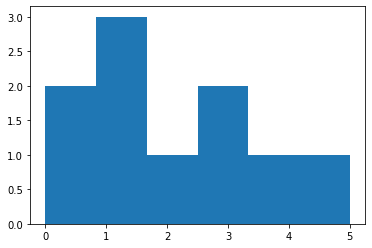

In [7]:
import matplotlib.pyplot as plt
import numpy as np     # 추가적으로 random 함수를 안 불러와도 된다.
# np contains random library
dice = np.random.choice(6,10)   # 0~5 에서 choice, 10 times
print(dice)
plt.hist(dice, bins=6)
plt.show()

[2, 2, 2, 6, 5, 5, 1, 1, 6, 5]


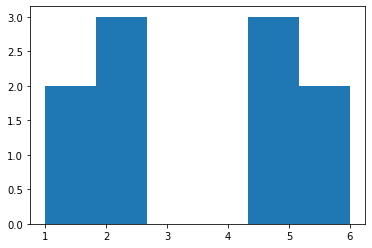

In [8]:
# 위의 code를 numpy를 사용하지 않는다면
import matplotlib.pyplot as plt
import random
dice =[]
for i in range(10):
    dice.append(random.randint(1,6))   #start~end, include end
print(dice)
plt.hist(dice, bins=6)
plt.show()

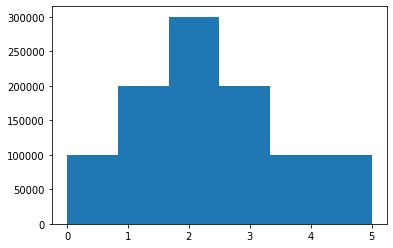

In [9]:
# giving random possibilities to numpy.random.choice
import matplotlib.pyplot as plt
import numpy as np
dice = np.random.choice(6,1000000,p =[0.1,0.2,0.3,0.2,0.1,0.1])
plt.hist(dice, bins=6)
plt.show()

# NumPy를 활용한 데이터 분석

1. 관심 있는 데이터 찾기
2. 데이터 살펴보며 질문하기
3. 질문을 명확한 문제로 정의하기
4. 알고리즘 설계하기
5. 알고리즘을 코드로 표현


ex)
1. 관심있는 데이터 : 공공데이터 -> 대한민국 인구 데이터
2. 질문 : 우리 동네의 인구 구조와 가장 비슷한 동네는 어디일까..
3. 명확한 문제로 정의 : 전국 읍면동 중 우리 동네의 연령별 인구 구조와가장 형태가 비슷한 지역?
4. 1) 데이터 읽어와서 2) 궁금한 지역의 이름을 입력 3) 해당 지역 인구 구조 저장 4) 궁금한 지역과 연령별 인구구조가 가장 비슷한 지역 찾기 5) 두 지역의 인구구조를 시각화
5. 코드로 표현


In [ ]:
# 지역명(동)을 입력 받아서 연령별 인구수 데이터 시각화하기 (NumPy활용 X)
import csv
f = open('age.csv', encoding='cp949')
data = csv.reader(f)
result = []
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력: ')
for row in data :
    if name in row[0]:
        for i in row[3:]:    #0세, 1세,... 데이터 저장
            result.append(int(i))
f.close()    # Don't forget to close file!!!!
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('font', family = 'Apple SD Gothic Neo')  #Font지정을 항상 한글 값 지정 코드보다 앞서서
plt.title(name+' 지역의 인구 구조')
plt.plot(result)
plt.show()

In [ ]:
# 궁금한 지역의 인구 데이터 출력 using NumPy
import numpy as np
import csv
f = open('age.csv', encoding = 'cp949')
data = csv.reader(f)
next(data)
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력: ')
for row in data :
    if name in row[0]:
        home = np.array(row[3:], dtype=int)
        # NumPy Library를 통해 for loop 없이 한번에 array에 형태로 저장
f.close()    # Don't forget to close file!!!!
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rc('font', family = 'Apple SD Gothic Neo')
plt.title(name+' 지역의 인구 구조')
plt.plot(home)
plt.show()

In [ ]:
# 궁금한 역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역을 찾을때,
# 어떤 알고리즘을 사용해야할까?
# Algo ver1)
# A 지역과 B 지역의 연령별 차이를 계산, 0~100까지 반복 모두 합산
# 모든 지역에 대해 반복, 그 차이가 가장 작은 지역

# Problem with Algo ver1)
# 이 알고리즘은 인구 규모가 다른 지역의 인구 구조를 비교할 수 없는 문제가 생긴다..
# ex) 인구 차이가 많이 차이나도 인구 구조(연령 비율)은 비슷할 수 있다

In [ ]:
# csv reader 의 특징, f.seek()함수 사용!!
import numpy as np
import csv
f = open('age.csv', encoding = 'cp949')
data = csv.reader(f)
next(data)
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력: ')

for row in data:
    if name in row[0]:
        home = np.array(row[3:],dtype=int)/ int(row[2])
        # 각 연령별 인구 값(int) / 총 인구 (int) : 인구비율 계산
# home : 해당 지역의 연령별 인구 비율

# csv.reader객체의 특징!!!
# 위에서 한 번 쭉 마지막까지 도달했기 때문에 자동소멸 => data is now gone
# Not an error, but nothing is printed
for row in data :  #다시 data를 읽을때 읽을 수 없음..
    print(row)
    
# 따라서 f.seek(0) 함수를 통해 starting지점을 다시 지정해준다!!!
f.seek(0)
data = csv.reader(f)
next(data)
for row in data:
    if name in row[0]:
        print(row)
# f.seek(0) 함수를 사용하는 것이 아니라 애초에 처음 data를 입력받았을때,
# 통째로 list에 저장해 놓고 사용할 수도 있지만, 이는 용량이 너무 크지 않은 경우만 사용가능
f.close()

In [ ]:
# Algo ver2)
# 지역별 인구를 비율로 계산!!
# A의 i세 인구 비율과 B의 i세 인구 비율을 뺀다. (i: 0~100)
# 이 비율의 차이를 각 각 모두 더해서 이 값이 가장 작은 지역

# 입력된 지역의 인구비율을 계산해주는 코드가 추가로 필요하다
import numpy as np
import csv
f = open('age.csv', encoding = 'cp949')
data = csv.reader(f)
next(data)
data = list(data)  #이번에는 f.seek(0)대신 리스트에 통째로 저장해놓고 재활용 예정
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력: ')

for row in data:
    if name in row[0]: #검색 지역의 연령별 인구비율 계산
        home = np.array(row[3:],dtype=int)/ int(row[2])
        # 각 연령별 인구 값(int) / 총 인구 (int) : 인구비율 계산
# home : 해당 지역의 연령별 인구 비율

min =1
result_name = ' '
result=0
for row in data : # 모든 지역의 연령별 인구비율 계산, 차이의 합 계산
    away = np.array(row[3:],dtype=int)/int(row[2])
    s = np.sum(home-away)
    if s < min :
        min = s
        result_name = row[0]
        result = away
    
f.close()

# 입력 지역, 찾은 지역 인구 비율 데이터를 하나의 그래프로 도식화
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize =(10,5),dpi=300)
plt.rc('font', family = 'Apple SD Gothic Neo')
plt.title(name+' 지역의 인구과 가장 비슷한 인구 구조를 가진 지역')
plt.plot(home, label = name)
plt.plot(result, label = result_name)
plt.legend()
plt.show()

Algo ver2) 결과, 연령별 인구비율 차이의 합은 최소 지역이나 실제 연령별 인구 비율 구성은 비슷하지 않은 결과...
<br><br>
문제1 : 두 지역의 인구비율 값의 상쇄가 일어난다.<br>
-> 즉, A-B>0 인 portion과 A-B<0인 portion이 상쇄되면서 0에 수렴하는 값이 된다.. (결과는 달라도)
<br>

문제2 : 두 지역의 인구비율 값의 합이 0보다 더 작은 음수인 지역이 선택된다.<br>
-> minus 가 될수록 minimum으로 선택된다!!
<br><br>
지역별 인구 비율의 차이로 계산하는 것이 문제였다.
==> 차이의 제곱의 합으로 계산해보자!! (Algo ver3)

In [ ]:
# Algo ver3)
# 지역별 인구를 비율로 계산!! + 차이의 제곱의 합을 비교 
# A의 i세 인구 비율과 B의 i세 인구 비율을 뺀다. (i: 0~100)
# 이 비율의 차이의 제곱을 계산, 모두 더해서 이 차이의 제곱값이 가장 작은 지역

import numpy as np
import csv
f = open('age.csv', encoding = 'cp949')
data = csv.reader(f)
next(data)
data = list(data)  # f.seek(0)대신 리스트에 통째로 저장해놓고 재활용 예정
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력: ')

for row in data:
    if name in row[0]: #검색 지역의 연령별 인구비율 계산
        home = np.array(row[3:],dtype=int)/ int(row[2])
        # 각 연령별 인구 값(int) / 총 인구 (int) : 인구비율 계산
# home : 해당 지역의 연령별 인구 비율

min =1
result_name = ' '
result=0
for row in data : # 모든 지역의 연령별 인구비율 계산, 차이의 합 계산
    away = np.array(row[3:],dtype=int)/int(row[2])
    s = np.sum((home-away)**2)   # 두 값의 차의 제곱
    if s < min :
        min = s
        result_name = row[0]
        result = away
    
f.close()

# 입력 지역, 찾은 지역 인구 비율 데이터를 하나의 그래프로 도식화
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize =(10,5),dpi=300)
plt.rc('font', family = 'Apple SD Gothic Neo')
plt.title(name+' 지역의 인구과 가장 비슷한 인구 구조를 가진 지역')
plt.plot(home, label = name)
plt.plot(result, label = result_name)
plt.legend()
plt.show()

Algo3)의 문제: 중복 제거 안해주었다! (입력 지역은 제외시켜주자)
- 하지만 데이터 분석 logic 자체는 제대로 가고 있다는 것을 확인할 수 있다!!

In [ ]:
# Algo ver4) --최종--
# 지역별 인구를 비율로 계산!! + 차이의 제곱의 합을 비교 + 입력지역 중복 제거
# A의 i세 인구 비율과 B의 i세 인구 비율을 뺀다. (i: 0~100)
# 이 비율의 차이의 제곱을 계산, 모두 더해서 이 차이의 제곱값이 가장 작은 지역

# 1) data read
import numpy as np
import csv
f = open('age.csv', encoding = 'cp949')
data = csv.reader(f)
next(data)
data = list(data)

# 2) Input Query Region Name, 인구 구조 저장
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력: ')
for row in data:
    if name in row[0]: #검색 지역의 연령별 인구비율 계산
        home = np.array(row[3:],dtype=int)/ int(row[2])
        # 각 연령별 인구 값(int) / 총 인구 (int) : 인구비율 계산
# home : 해당 지역의 연령별 인구 비율

min =1
result_name = ' '
result=0

# 3) 궁금한 지역의 인구구조와 가장 비슷한 지역 찾기
for row in data : # 모든 지역의 연령별 인구비율 계산, 차이의 합 계산
    away = np.array(row[3:],dtype=int)/int(row[2])
    s = np.sum((home-away)**2)   # 두 값의 차의 제곱
    if s < min and name not in row[0]: # 입력된 인구 데이터 비교군에서 제외 (ver3와 차이)
        min = s
        result_name = row[0]
        result = away
    
f.close()

# 입력 지역, 찾은 지역 인구 비율 데이터를 하나의 그래프로 도식화
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize =(10,5),dpi=300)
plt.rc('font', family = 'Apple SD Gothic Neo')
plt.title(name+' 지역의 인구과 가장 비슷한 인구 구조를 가진 지역')
plt.plot(home, label = name)
plt.plot(result, label = result_name)
plt.legend()
plt.show()